In [1]:
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.size'] = 14
plt.rcParams['font.serif'] = 'Times New Roman'
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

In [4]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# 
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
label_encoder = LabelEncoder()

# 
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 
numeric_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                   'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [6]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,-1.934250,-2.386180,-2.159696,1,-0.621527,0.006625,0.059597,0.664502
1,4,4,0,1,0,0,0,2,0,0,10,-0.526857,-0.303547,-0.051548,0,-0.621527,0.006625,-1.012342,-0.267579
2,4,4,1,0,0,0,0,2,0,0,8,-0.714510,0.227770,0.742649,0,-0.133707,-0.716973,-0.811354,1.130543
3,3,4,1,1,0,0,0,2,0,1,11,0.880535,0.461569,0.015913,0,-0.621527,0.006625,0.997544,0.198462
4,2,4,0,0,0,0,0,0,0,1,12,1.912623,0.227770,-0.652562,1,-0.621527,-0.877772,-0.744358,-0.733620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,1,-0.245379,-0.090833,0.064975,0,-0.133707,0.006625,-0.476373,-0.733620
308850,1,3,1,0,0,0,0,2,0,1,9,0.880535,-0.643702,-1.095656,0,0.354113,-0.596373,3.007431,-0.267579
308851,4,0,1,0,0,0,1,3,0,0,2,-1.277466,-1.047579,-0.603499,1,-0.133707,0.408624,-0.476373,-0.267579
308852,4,4,1,0,0,0,0,0,0,1,9,1.162014,-0.197190,-0.750686,0,-0.255662,0.006625,-0.208388,-0.733620


In [7]:
df_res = df.iloc[:1000,:] #sample

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

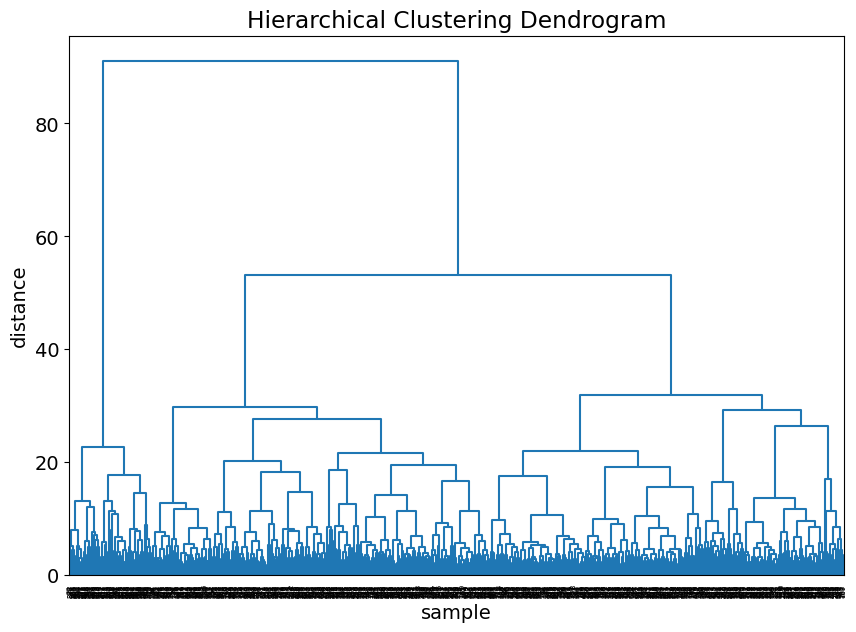

In [8]:
#
Z = linkage(df_res, method='ward')

# 
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_res.index.tolist(), orientation='top', color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample')
plt.ylabel('distance')
plt.show()

In [12]:
Z = linkage(df_res, method='ward')

# 
clusters = fcluster(Z, t=3, criterion='maxclust')

# 
df_res['Cluster'] = clusters

In [9]:
df_res

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster
0,3,2,0,0,0,0,0,0,1,0,10,-1.934250,-2.386180,-2.159696,1,-0.621527,0.006625,0.059597,0.664502,3
1,4,4,0,1,0,0,0,2,0,0,10,-0.526857,-0.303547,-0.051548,0,-0.621527,0.006625,-1.012342,-0.267579,2
2,4,4,1,0,0,0,0,2,0,0,8,-0.714510,0.227770,0.742649,0,-0.133707,-0.716973,-0.811354,1.130543,2
3,3,4,1,1,0,0,0,2,0,1,11,0.880535,0.461569,0.015913,0,-0.621527,0.006625,0.997544,0.198462,2
4,2,4,0,0,0,0,0,0,0,1,12,1.912623,0.227770,-0.652562,1,-0.621527,-0.877772,-0.744358,-0.733620,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,1,0,0,0,0,0,0,0,5,0.411404,-0.090833,-0.313725,1,-0.621527,0.006625,-0.677361,-0.733620,1
996,4,4,0,0,0,0,1,0,0,1,4,0.411404,0.652731,0.478939,0,-0.621527,0.006625,0.997544,0.664502,1
997,2,3,1,0,0,0,0,0,0,1,7,1.912623,0.971802,0.018979,1,0.841932,-0.395374,0.059597,-0.500600,2
998,4,4,1,0,0,0,0,0,0,1,1,2.100275,-0.090833,-1.029728,0,0.232158,0.006625,-1.012342,1.596584,1


In [10]:
df_res.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cluster'],
      dtype='object')

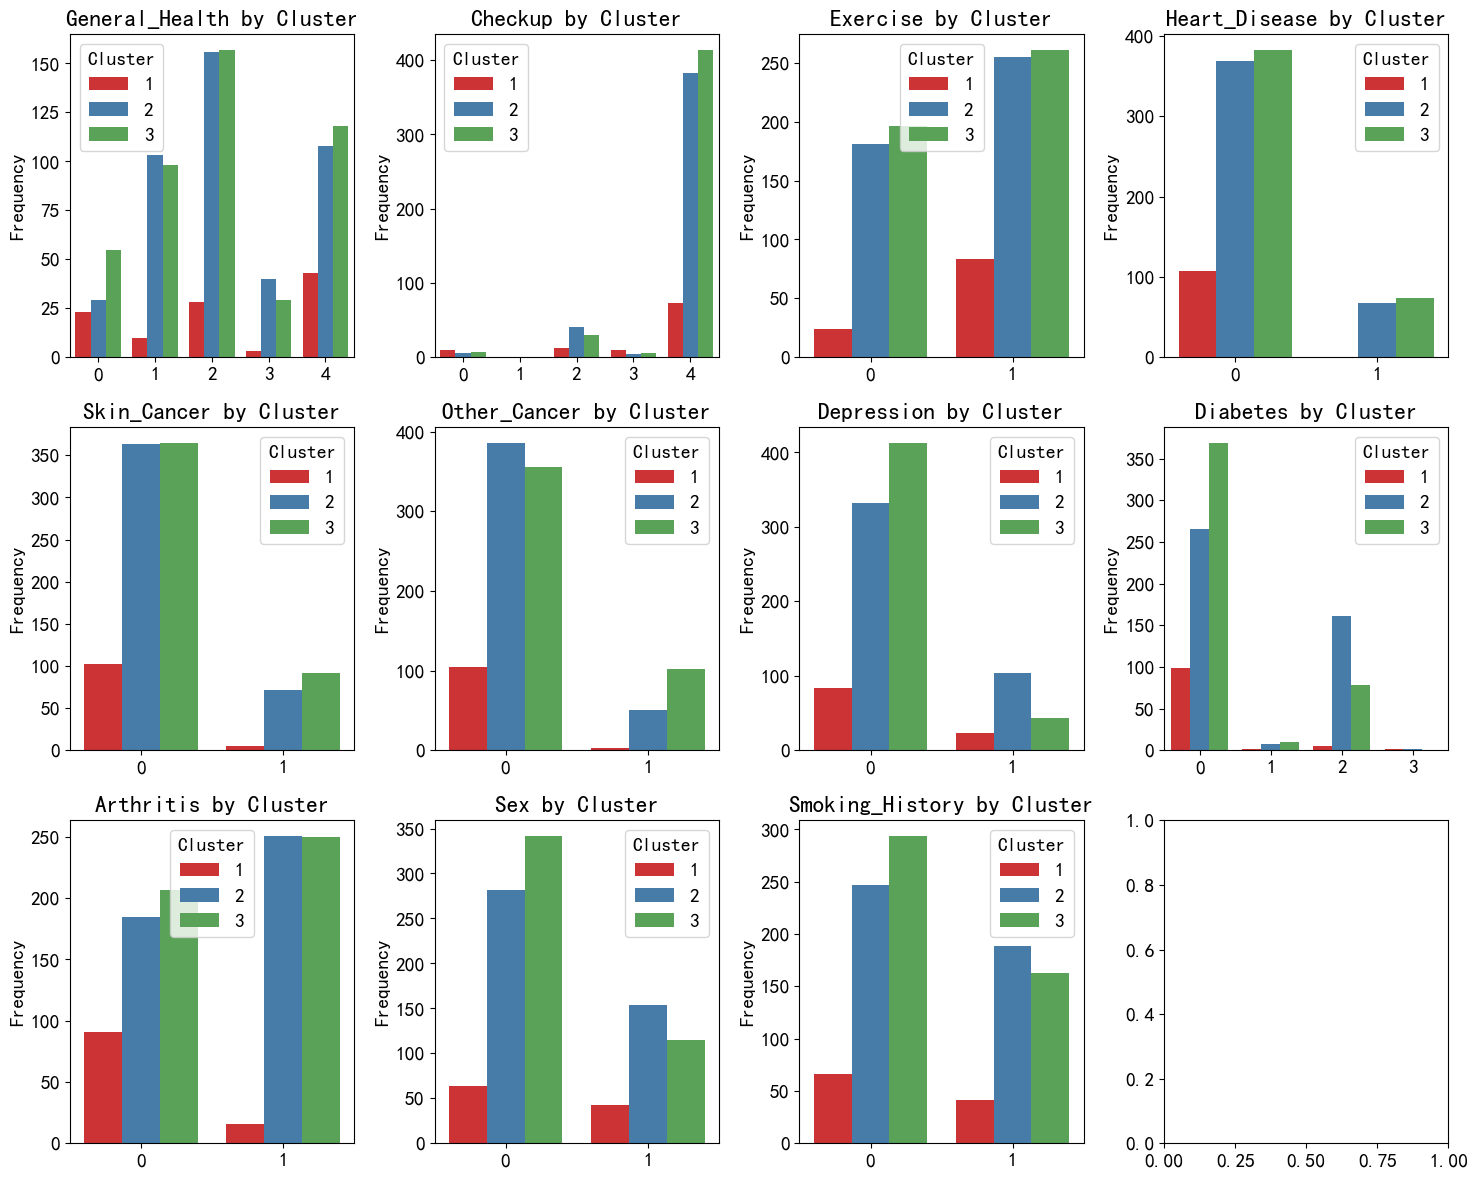

In [13]:

categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History']

#
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.ravel()  #

# 
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Cluster', data=df_res, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'{col} by Cluster')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(title='Cluster')

# 
plt.tight_layout()
plt.show()

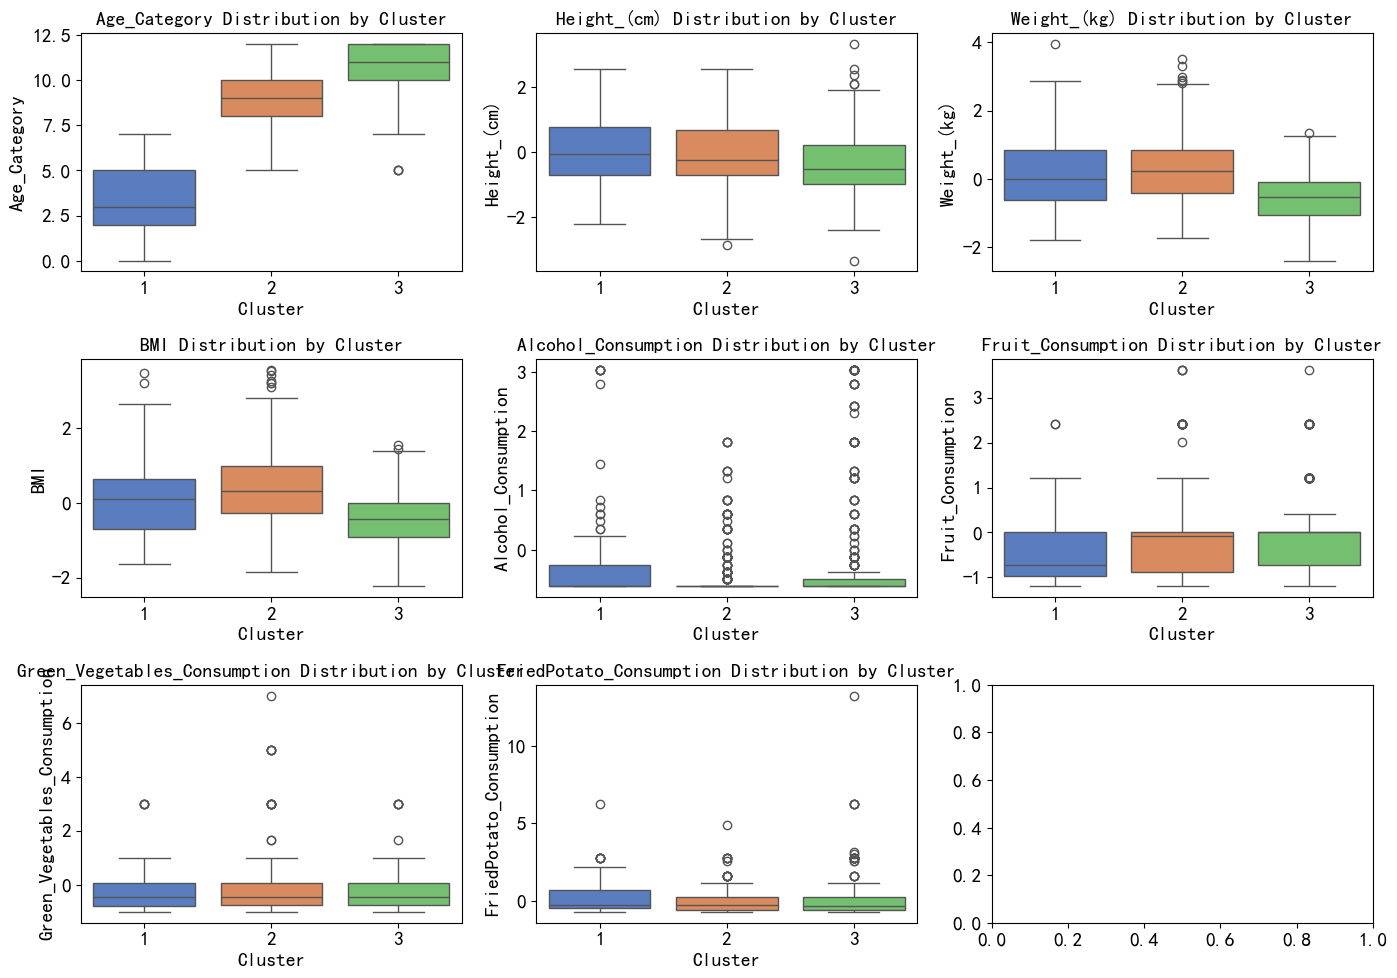

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="whitegrid", palette="deep")

# 
features = ['Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] 

# 
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# 
for i, feature in enumerate(features):
    row = i // 3  
    col = i % 3   
    sns.boxplot(x='Cluster', y=feature, data=df_res, ax=axes[row, col], palette="muted")
    axes[row, col].set_title(f'{feature} Distribution by Cluster', fontsize=14, fontweight='bold')

# 
plt.tight_layout()
plt.show()
